In [4]:
# Algunas bibliotecas necesarias
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn

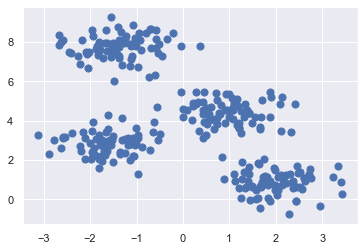

In [5]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[0 1 3 1 0 0 2 3 1 1 2 1 3 1 0 3 3 0 2 2 0 0 3 2 2 3 0 3 2 3 1 1 3 1 1 1 1
 1 2 0 3 2 3 3 2 2 1 2 1 0 2 0 1 0 0 2 1 2 1 0 1 3 1 2 2 2 1 0 1 2 3 2 1 2
 2 1 2 3 0 1 0 3 0 0 1 3 0 3 1 1 3 0 1 2 2 3 0 0 3 2 1 0 1 0 3 0 0 3 1 3 2
 2 0 1 0 3 1 0 0 3 2 0 2 0 0 0 0 2 0 2 1 2 2 0 1 2 2 1 3 1 1 2 3 2 3 2 1 3
 1 1 1 3 1 3 0 2 1 2 0 3 1 3 3 0 3 2 2 3 0 3 3 1 0 3 2 1 0 0 3 2 0 3 2 2 3
 3 3 3 0 1 3 2 3 3 2 2 2 3 2 1 3 2 0 2 3 1 2 1 3 1 3 2 3 3 1 2 2 0 0 3 1 0
 0 2 0 2 3 1 1 3 3 1 3 0 2 3 0 2 1 2 0 3 0 1 1 1 1 2 2 1 3 2 0 3 2 2 2 0 0
 1 3 3 2 0 1 2 3 1 3 0 0 2 2 3 0 0 0 3 1 1 0 0 3 0 0 0 1 2 1 3 0 0 1 1 1 0
 0 3 1 2]


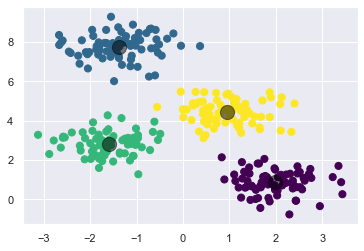

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Reto 1:

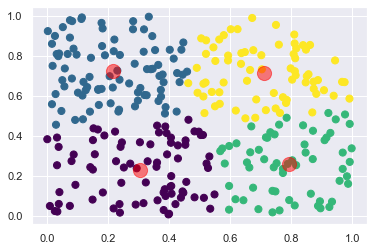

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def mi_algoritmo_kmeans(X, n_clusters, semilla):
    np.random.seed(semilla)
    n_samples, n_features = X.shape
    centroides = np.random.rand(n_clusters, n_features)
    antiguos_centroides = np.zeros(centroides.shape)
    etiquetas = np.zeros(n_samples)
    error = np.linalg.norm(centroides - antiguos_centroides)
    while error != 0:
        for i in range(n_samples):
            distancias = np.linalg.norm(X[i] - centroides, axis=1)
            etiquetas[i] = np.argmin(distancias)
        antiguos_centroides = centroides.copy()
        for i in range(n_clusters):
            puntos = [X[j] for j in range(n_samples) if etiquetas[j] == i]
            centroides[i] = np.mean(puntos, axis=0)
        error = np.linalg.norm(centroides - antiguos_centroides)
    return centroides, etiquetas

X = np.random.rand(300, 2)
centroides, etiquetas = mi_algoritmo_kmeans(X, 4, 123)

plt.scatter(X[:, 0], X[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)
plt.show()

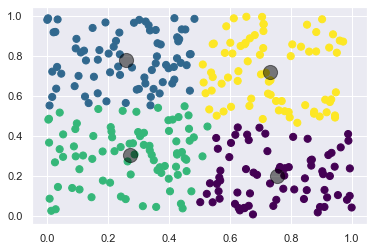

In [9]:
def mi_algoritmo_kmeans2(X1, n_clusters, semilla):
    np.random.seed(semilla)
    
    # Inicializa los centroides aleatoriamente
    centroides = X1[np.random.choice(X1.shape[0], n_clusters, replace=False), :]
    
    # Calcula la distancia euclidiana entre los puntos y los centroides
    def distancia_euclidiana(a, b):
        return np.sqrt(np.sum((a - b)**2))
    
    # Repite hasta que los centroides no cambien
    etiquetas_previas = np.zeros(X1.shape[0])
    while True:
        # Asigna cada punto al centroide más cercano
        etiquetas = np.array([np.argmin([distancia_euclidiana(x, centroides[i]) for i in range(n_clusters)]) for x in X1])
        
        # Si no hubo cambios en las etiquetas, termina
        if np.array_equal(etiquetas, etiquetas_previas):
            break
        
        # Actualiza las etiquetas previas
        etiquetas_previas = np.copy(etiquetas)
        
        # Recalcula los centroides como la media de los puntos en cada cluster
        for i in range(n_clusters):
            centroides[i] = np.mean(X1[etiquetas == i], axis=0)
    
    return centroides, etiquetas

# Crea una variable multidimensional con datos aleatorios
X1 = np.random.rand(300, 2)

# Ejecuta la función "mi_algoritmo_kmeans2" con 4 clusters y semilla 123
centroides, etiquetas = mi_algoritmo_kmeans2(X1, 4, 123)

# Graficando resultados
plt.scatter(X1[:, 0], X1[:, 1], c=etiquetas, s=50, cmap='viridis')

#centroides = kmeans.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);

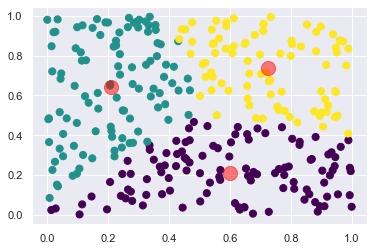

In [10]:
def mi_algoritmo_kmeans(X, n_clusters, semilla):
    np.random.seed(semilla)
    n_samples, n_features = X.shape
    centroides = np.random.rand(n_clusters, n_features)
    antiguos_centroides = np.zeros(centroides.shape)
    etiquetas = np.zeros(n_samples)
    error = np.linalg.norm(centroides - antiguos_centroides)
    while error != 0:
        for i in range(n_samples):
            distancias = np.linalg.norm(X[i] - centroides, axis=1)
            etiquetas[i] = np.argmin(distancias)
        antiguos_centroides = centroides.copy()
        for i in range(n_clusters):
            puntos = [X[j] for j in range(n_samples) if etiquetas[j] == i]
            centroides[i] = np.mean(puntos, axis=0)
        error = np.linalg.norm(centroides - antiguos_centroides)
    return centroides, etiquetas

X = np.random.rand(300, 2)
centroides, etiquetas = mi_algoritmo_kmeans(X, 3, 123)

plt.scatter(X[:, 0], X[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)
plt.show()

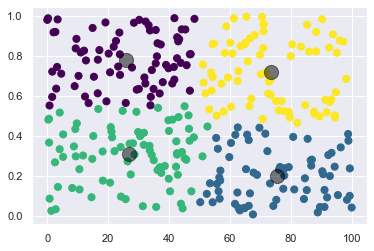

In [11]:
def mi_algoritmo_kmeans2(X1, n_clusters, semilla):
    np.random.seed(semilla)
    
    # Inicializa los centroides aleatoriamente
    centroides = X1[np.random.choice(X1.shape[0], n_clusters, replace=False), :]
    
    # Calcula la distancia euclidiana entre los puntos y los centroides
    def distancia_euclidiana(a, b):
        return np.sqrt(np.sum((a - b)**2))
    
    # Repite hasta que los centroides no cambien
    etiquetas_previas = np.zeros(X1.shape[0])
    while True:
        # Asigna cada punto al centroide más cercano
        etiquetas = np.array([np.argmin([distancia_euclidiana(x, centroides[i]) for i in range(n_clusters)]) for x in X1])
        
        # Si no hubo cambios en las etiquetas, termina
        if np.array_equal(etiquetas, etiquetas_previas):
            break
        
        # Actualiza las etiquetas previas
        etiquetas_previas = np.copy(etiquetas)
        
        # Recalcula los centroides como la media de los puntos en cada cluster
        for i in range(n_clusters):
            centroides[i] = np.mean(X1[etiquetas == i], axis=0)
    
    return centroides, etiquetas

# Crea una variable multidimensional con datos aleatorios
X1 = np.random.rand(300, 2)
# Multiplicando por escalar e=100
e = 100
X_reescala = np.stack((e*X1[:, 0], X1[:, 1]), axis=1)

# Ejecuta la función "mi_algoritmo_kmeans2" con 4 clusters y semilla 123
centroides, etiquetas = mi_algoritmo_kmeans2(X1, 4, 123)

# Graficando resultados
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(e*centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);

#Reto 2

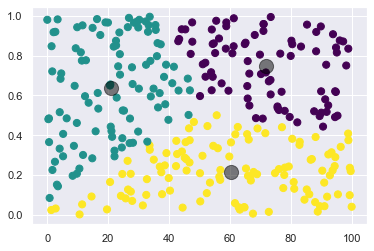

In [13]:
def mi_algoritmo_kmeans2(X1, n_clusters, semilla):
    np.random.seed(semilla)
    
    # Inicializa los centroides aleatoriamente
    centroides = X1[np.random.choice(X1.shape[0], n_clusters, replace=False), :]
    
    # Calcula la distancia euclidiana entre los puntos y los centroides
    def distancia_euclidiana(a, b):
        return np.sqrt(np.sum((a - b)**2))
    
    # Repite hasta que los centroides no cambien
    etiquetas_previas = np.zeros(X1.shape[0])
    while True:
        # Asigna cada punto al centroide más cercano
        etiquetas = np.array([np.argmin([distancia_euclidiana(x, centroides[i]) for i in range(n_clusters)]) for x in X1])
        
        # Si no hubo cambios en las etiquetas, termina
        if np.array_equal(etiquetas, etiquetas_previas):
            break
        
        # Actualiza las etiquetas previas
        etiquetas_previas = np.copy(etiquetas)
        
        # Recalcula los centroides como la media de los puntos en cada cluster
        for i in range(n_clusters):
            centroides[i] = np.mean(X1[etiquetas == i], axis=0)
    
    return centroides, etiquetas

# Crea una variable multidimensional con datos aleatorios
X1 = np.random.rand(300, 2)
# Multiplicando por escalar e=100
e = 100
X_reescala = np.stack((e*X1[:, 0], X1[:, 1]), axis=1)

# Ejecuta la función "mi_algoritmo_kmeans2" con 3 clusters y semilla 123
centroides, etiquetas = mi_algoritmo_kmeans2(X1, 3, 123)

# Graficando resultados
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(e*centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);

# 
# Al cambiar a 3 clusters, se modifican los centroides y la distancia entre puntos por grupos crece, por tanto es necesario iterar hasta encontrar la cantidad de clusters optimoo


# Reto 3:


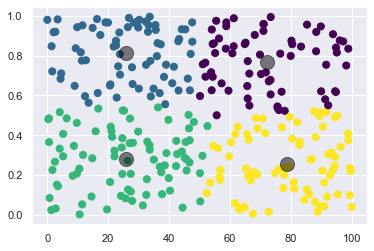

In [14]:
def mi_algoritmo_kmeans2(X1, n_clusters, semilla):
    np.random.seed(semilla)
    
    # Inicializa los centroides aleatoriamente
    centroides = X1[np.random.choice(X1.shape[0], n_clusters, replace=False), :]
    
    # Calcula la distancia euclidiana entre los puntos y los centroides
    def distancia_euclidiana(a, b):
        return np.sqrt(np.sum((a - b)**2))
    
    # Repite hasta que los centroides no cambien
    etiquetas_previas = np.zeros(X1.shape[0])
    while True:
        # Asigna cada punto al centroide más cercano
        etiquetas = np.array([np.argmin([distancia_euclidiana(x, centroides[i]) for i in range(n_clusters)]) for x in X1])
        
        # Si no hubo cambios en las etiquetas, termina
        if np.array_equal(etiquetas, etiquetas_previas):
            break
        
        # Actualiza las etiquetas previas
        etiquetas_previas = np.copy(etiquetas)
        
        # Recalcula los centroides como la media de los puntos en cada cluster
        for i in range(n_clusters):
            centroides[i] = np.mean(X1[etiquetas == i], axis=0)
    
    return centroides, etiquetas

# Crea una variable multidimensional con datos aleatorios
X1 = np.random.rand(300, 2)
# Multiplicando por escalar e=100
e = 100
X_reescala = np.stack((e*X1[:, 0], X1[:, 1]), axis=1)

# Ejecuta la función "mi_algoritmo_kmeans2" con 4 clusters y semilla 123
centroides, etiquetas = mi_algoritmo_kmeans2(X1, 4, 123)

# Graficando resultados
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(e*centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);


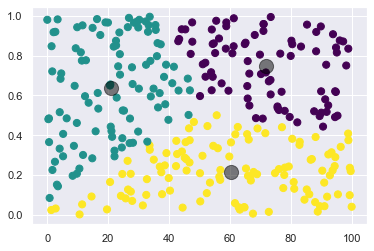

In [15]:
def mi_algoritmo_kmeans2(X1, n_clusters, semilla):
    np.random.seed(semilla)
    
    # Inicializa los centroides aleatoriamente
    centroides = X1[np.random.choice(X1.shape[0], n_clusters, replace=False), :]
    
    # Calcula la distancia euclidiana entre los puntos y los centroides
    def distancia_euclidiana(a, b):
        return np.sqrt(np.sum((a - b)**2))
    
    # Repite hasta que los centroides no cambien
    etiquetas_previas = np.zeros(X1.shape[0])
    while True:
        # Asigna cada punto al centroide más cercano
        etiquetas = np.array([np.argmin([distancia_euclidiana(x, centroides[i]) for i in range(n_clusters)]) for x in X1])
        
        # Si no hubo cambios en las etiquetas, termina
        if np.array_equal(etiquetas, etiquetas_previas):
            break
        
        # Actualiza las etiquetas previas
        etiquetas_previas = np.copy(etiquetas)
        
        # Recalcula los centroides como la media de los puntos en cada cluster
        for i in range(n_clusters):
            centroides[i] = np.mean(X1[etiquetas == i], axis=0)
    
    return centroides, etiquetas

# Crea una variable multidimensional con datos aleatorios
X1 = np.random.rand(300, 2)
# Multiplicando por escalar e=100
e = 100
X_reescala = np.stack((e*X1[:, 0], X1[:, 1]), axis=1)

# Ejecuta la función "mi_algoritmo_kmeans2" con 3 clusters y semilla 123
centroides, etiquetas = mi_algoritmo_kmeans2(X1, 3, 123)

# Graficando resultados
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], c=etiquetas, s=50, cmap='viridis')
plt.scatter(e*centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5);


CONCLUSIONES DEL RETO3.- Los resultados son similareas al reto anterior, pero con una mejor visualización de la escala, igualmente al cambiar a 3 clusters, se modifican los centroides y la distancia entre los puntos por cluster es mayor, por tanto es necesario iterar hasta encontrar la cantidad de clusters optimo; en donde la distancia entre el centro y puntos sea mínimo. P